In [15]:
import os
import torch
import torchvision
from skimage import io
from PIL import Image
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

from database_functions.databasereader import DatabaseReader

In [7]:
db_reader = DatabaseReader('crepcheque')

get_images_query = """SELECT
                            r.crep_id,
                            r.raw_brand_text,
                            i.image_id,
                            i.image_type,
                            i.image_file_path
                        FROM raw_creps r
                        LEFT JOIN
                            images i
                            ON r.crep_id = i.crep_id

                        WHERE
                            r.images IS NOT NULL
                            AND r.images_processed = true
                            AND i.image_downloaded = true
                        """

sneaker_images = db_reader.send_query(query=get_images_query, return_as_df=True)

In [8]:
sneaker_images.shape

(328852, 5)

In [3]:
# img_names = ["../dissertation_old/data/barry_data/" + filename for filename in os.listdir("../dissertation_old/data/barry_data/")[:20]]

# test_df = pd.DataFrame([img_names, [i for i in range(20)]]).T
# test_df.columns = ["img_name","label"]

In [6]:
class ShoeDataSet(Dataset):
    
    def __init__(self, data_df, transform = None):
        
        self.data_df = data_df
        self.transform = transform
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, idx):
        
        if torch.is_tensor(idx):
            idx = idx.tolist()
    
        
        img_name = self.data_df.iloc[idx, 4] 

        image = Image.open(img_name)
        print("PIL size", image.size)
        arr_img = np.array(image)
        print("np size", arr_img.shape)
        label = self.data_df.iloc[idx, 1]

        
        sample  ={"image":image, "label":label}

        
        if self.transform:
            image,label = sample["image"],sample["label"]
            image = self.transform(image)
        image = np.array(image)
        print("last arr shape", image.shape)
        sample = {"image":image, "label":label, "file_name":img_name}

        return sample
        

In [189]:
"""
1) transorms
2) totensor
3) normalize
4) scale

""";

In [11]:
"""

CALCULATE DATASET MEAN AND STD

"""

trans = torchvision.transforms.Compose([
    torchvision.transforms.Resize((500,300)),
    torchvision.transforms.ToTensor(),

#     torchvision.transforms.Normalize()
])

In [12]:
shoe_set = ShoeDataSet(sneaker_images, transform=trans)

In [17]:
sneaker_images.raw_brand_text.value_counts()

Nike           161895
Jordan          61191
adidas          53898
Vans             8231
New Balance      7040
                ...  
Superga             1
Bait                1
Columbia            1
Pony                1
Crocs               1
Name: raw_brand_text, Length: 112, dtype: int64

In [13]:
test_loader = DataLoader(shoe_set, shuffle=True, batch_size = 2)

PIL size (1170, 781)
np size (781, 1170, 3)
last arr shape (3, 500, 300)
PIL size (1170, 781)
np size (781, 1170, 3)
last arr shape (3, 500, 300)
['/home/max/hdd-data1/images/original/11286-115787-original.jpg', '/home/max/hdd-data1/images/original/20300-207308-original.jpg']
PIL size (1170, 779)
np size (779, 1170, 3)
last arr shape (3, 500, 300)
PIL size (1170, 780)
np size (780, 1170, 3)
last arr shape (3, 500, 300)
['/home/max/hdd-data1/images/original/32354-328584-original.jpg', '/home/max/hdd-data1/images/original/11711-120447-original.jpg']
PIL size (1170, 780)
np size (780, 1170, 3)
last arr shape (3, 500, 300)
PIL size (1170, 781)
np size (781, 1170, 3)
last arr shape (3, 500, 300)
['/home/max/hdd-data1/images/original/12253-126260-original.jpg', '/home/max/hdd-data1/images/original/1996-20089-original.jpg']
PIL size (1170, 517)
np size (517, 1170, 3)
last arr shape (3, 500, 300)
PIL size (1170, 780)
np size (780, 1170, 3)
last arr shape (3, 500, 300)
['/home/max/hdd-data1/ima

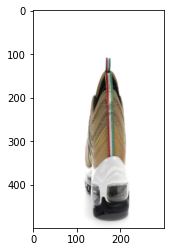

In [16]:
for idx,data in enumerate(test_loader,1):
    image,label, filename = data["image"],data["label"], data["file_name"]
    print(filename)
#     print(image[0].shape)
#     plt.imshow(np.transpose(image[1],(1,2,0)))
    plt.imshow(np.transpose(image[1],(1,2,0)))
#     plt.imshow(image[0])
    if idx == 5:
        break

In [255]:
image[0].std()

tensor(0.5309)

In [272]:
image[0][0][300]

tensor([ 2.2489,  2.2489,  2.2489,  2.2147,  2.0434,  1.8893,  1.8722,  1.8379,
         1.8208,  1.5639,  0.7762, -1.1247, -1.6213, -1.5528, -1.5528, -1.6042,
        -1.6213, -1.6213, -1.6384, -1.6555, -1.6727, -1.6898, -1.7240, -1.7240,
        -1.7240, -1.7240, -1.7240, -1.7240, -1.7240, -1.7069, -1.7069, -1.6898,
        -1.7069, -1.7240, -1.7069, -1.7412, -1.7412, -1.7412, -1.7412, -1.7412,
        -1.7583, -1.7583, -1.7925, -1.7754, -1.7754, -1.7412, -0.7822,  1.4612,
         1.5982,  1.6495,  1.6495,  1.6495,  1.6495,  1.6495,  1.6495,  1.6324,
         1.6324,  1.6324,  1.6324,  1.6324,  1.6324,  1.6324,  1.6324,  1.6495,
         1.6495,  1.6495,  1.6153,  1.6153,  1.5297,  1.5639,  0.4851, -1.6384,
        -1.7925, -1.8097, -1.8097, -1.8097, -1.8097, -1.7925, -1.8268, -1.8439,
        -1.8610, -1.8782, -1.8610, -1.8610, -1.8610, -1.8439, -1.8439, -1.8610,
        -1.8439, -1.8439, -1.8439, -1.8439, -1.8439, -1.8097, -1.8268, -1.7925,
        -1.8268, -1.8268, -1.8268, -1.75

In [14]:
import matplotlib.pyplot as plt

In [6]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomPerspective(p = 0.3), # randomly change img perspective
    torchvision.transforms.,
    
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
])

In [ ]:
for i in samples_df